#MEDIAPIPE SEGMENTATION

In [ ]:
!pip install mediapipe

In [140]:
import cv2
import mediapipe as mp
import numpy as np
mp_drawing = mp.solutions.drawing_utils
mp_selfie_segmentation = mp.solutions.selfie_segmentation

In [141]:
#Segmentation, this function receives a single image per use, the image must be a numpy matrix 
#this function returns a mask of the segmentated person

def segmentation(image):
  BG_COLOR = (192, 192, 192) # gray
  MASK_COLOR = (255, 255, 255) # white
  with mp_selfie_segmentation.SelfieSegmentation(
      model_selection=0) as selfie_segmentation:
      image_height, image_width, _ = image.shape
      # Convert the BGR image to RGB before processing.
      results = selfie_segmentation.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

      # Draw selfie segmentation on the background image.
      # To improve segmentation around boundaries, consider applying a joint
      # bilateral filter to "results.segmentation_mask" with "image".
      condition = np.stack((results.segmentation_mask,) * 3, axis=-1) > 0.1
      # Generate solid color images for showing the output selfie segmentation mask.
      fg_image = np.zeros(image.shape, dtype=np.uint8)
      fg_image[:] = MASK_COLOR
      bg_image = np.zeros(image.shape, dtype=np.uint8)
      bg_image[:] = BG_COLOR
      output_image = np.where(condition, fg_image, bg_image)
      return output_image

<class 'numpy.ndarray'>


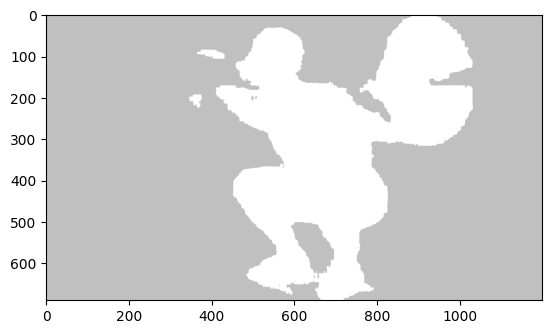

In [142]:
image = cv2.imread('sentadilla.jpg')
print(type(image))
x = segmentation(image)

import matplotlib.pyplot as plt
plt.imshow(x)


#YOLO SEGMENTATION

In [ ]:
!pip install ultralytics

In [1]:
import cv2
import numpy as np
from ultralytics import YOLO
import matplotlib.pyplot as plt

In [2]:
model = YOLO('yolov8x-seg.pt')
#model.to('cuda') #uncomment this if cuda is available


0: 384x640 1 person, 5667.4ms
Speed: 19.0ms preprocess, 5667.4ms inference, 50.0ms postprocess per image at shape (1, 3, 640, 640)


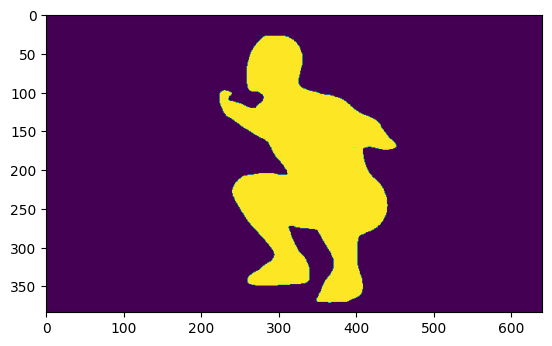

In [4]:
#Segmentation, this function receives a single image per use, the image must be a numpy matrix 
#this function returns a mask of the segmentated person or returns 0 if not persons were found

def yoloseg(img):
  #Get model results
  results = model(img)
  results = results[0]
  clases = results.boxes.cls.cpu().numpy().astype(int)
  #Find person index mask
  person = 0
  index = np.where(clases == person)[0]
  if np.size(index) == 0:
    #No persons were found
    return 0
  #return person mask as numpy array where mask is set to 1
  return results.masks.data.cpu().numpy()[index[0]].astype(int)


#Example of function call
image = cv2.imread('D:\Onedrive\Documentos\Escuela\semestre 5\Seminario de Analisis de Mov\proyecto\sentadilla.jpg')
res = yoloseg(image)
#show the mask
plt.imshow(res)
plt.show()